In [1]:
%load_ext nb_black

<IPython.core.display.Javascript object>

### Importing libraries required for scraping and data manipulation

In [2]:
import os
import pandas as pd

<IPython.core.display.Javascript object>

#### Getting the search key word

In [3]:
search_term = input("Enter Search term: ")

Enter Search term: Russell Wilson


<IPython.core.display.Javascript object>

#### Getting the current date in the required format using strftime

In [4]:
from datetime import datetime

<IPython.core.display.Javascript object>

In [5]:
today = datetime.now()
date = today.strftime("%Y-%m-%d")

<IPython.core.display.Javascript object>

### Scraping the tweets using snscrape

In [6]:
arg = "twitter-search"
os.system(
    f'snscrape --jsonl --progress --max-results 200 {arg} "{search_term} until:{date}" > text-query-tweets.json'
)

Scraping, 100 results so far
Scraping, 200 results so far
Stopped scraping after 200 results due to --max-results


0

<IPython.core.display.Javascript object>

### Getting the data from the JSON file and converting it to a pandas dataframe

In [7]:
tweets_df = pd.read_json("text-query-tweets.json", lines=True)

<IPython.core.display.Javascript object>

In [8]:
tweets_df.head()

,_type,url,date,rawContent,renderedContent,id,user,replyCount,retweetCount,likeCount,...,retweetedTweet,quotedTweet,inReplyToTweetId,inReplyToUser,mentionedUsers,coordinates,place,hashtags,cashtags,card
0,snscrape.modules.twitter.Tweet,https://twitter.com/edwards_jereme/status/1597...,2022-11-27 23:59:57+00:00,@daverichard Still had better day then Russell...,@daverichard Still had better day then Russell...,1597017414533013505,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,0,...,NaN,None,1.597017e+18,"{'_type': 'snscrape.modules.twitter.User', 'us...","[{'_type': 'snscrape.modules.twitter.User', 'u...",None,None,None,NaN,None
1,snscrape.modules.twitter.Tweet,https://twitter.com/Strangeland251/status/1597...,2022-11-27 23:59:43+00:00,Russell Wilson Trade Deemed 'Worst Deal in Spo...,Russell Wilson Trade Deemed 'Worst Deal in Spo...,1597017357695623168,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,1,...,NaN,None,NaN,None,"[{'_type': 'snscrape.modules.twitter.User', 'u...",None,None,None,NaN,{'_type': 'snscrape.modules.twitter.SummaryCar...
2,snscrape.modules.twitter.Tweet,https://twitter.com/liverpoolfc21k/status/1597...,2022-11-27 23:59:31+00:00,"Russell Wilson or Tim Tebow, which would @Bron...","Russell Wilson or Tim Tebow, which would @Bron...",1597017305900142592,"{'_type': 'snscrape.modules.twitter.User', 'us...",1,0,0,...,NaN,None,NaN,None,"[{'_type': 'snscrape.modules.twitter.User', 'u...",None,None,"[NFL, Broncos, DENvsCAR, BroncosCountry]",NaN,"{'_type': 'snscrape.modules.twitter.PollCard',..."
3,snscrape.modules.twitter.Tweet,https://twitter.com/properplays/status/1597017...,2022-11-27 23:59:06+00:00,"And Russell Wilson replied, ""ok, let's ride"" 🙄...","And Russell Wilson replied, ""ok, let's ride"" 🙄...",1597017202602803200,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,0,...,NaN,"{'_type': 'snscrape.modules.twitter.Tweet', 'u...",NaN,None,None,None,None,"[broncos, broncoscountry]",NaN,None
4,snscrape.modules.twitter.Tweet,https://twitter.com/WORLDNE10696852/status/159...,2022-11-27 23:58:46+00:00,Russell Wilson suffers another Twitter pile-on...,Russell Wilson suffers another Twitter pile-on...,1597017115264839680,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,0,...,NaN,None,NaN,None,None,None,None,None,NaN,{'_type': 'snscrape.modules.twitter.SummaryCar...


<IPython.core.display.Javascript object>

#### Getting the dataframe that we will actually be manipulating

In [9]:
df = tweets_df[["renderedContent"]]
df.head()

,renderedContent
0,@daverichard Still had better day then Russell...
1,Russell Wilson Trade Deemed 'Worst Deal in Spo...
2,"Russell Wilson or Tim Tebow, which would @Bron..."
3,"And Russell Wilson replied, ""ok, let's ride"" 🙄..."
4,Russell Wilson suffers another Twitter pile-on...


<IPython.core.display.Javascript object>

In [10]:
df = df.rename(columns={"renderedContent": "tweets"})

<IPython.core.display.Javascript object>

### Importing the libraries required cleaning the tweets

In [11]:
import re
import nltk

nltk.download("punkt")
nltk.download("stopwords")

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package punkt to /Users/haran/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/haran/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


<IPython.core.display.Javascript object>

In [12]:
stop_words = stopwords.words("english")
print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

<IPython.core.display.Javascript object>

#### Function for cleaning tweets

In [13]:
def tweetCleaning(tweet):
    clean_tweet = re.sub(r"@[a-zA-Z0-9]+", "", tweet)  # removes mentions
    clean_tweet = re.sub(
        r"#[a-zA-Z0-9]+\s", "", clean_tweet
    )  # removes hashtags and blank spaces
    clean_tweet = " ".join(
        word for word in clean_tweet.split() if word not in stop_words
    )  # removing all the stopwords from the tweet
    return clean_tweet

<IPython.core.display.Javascript object>

In [14]:
df["cleaned_tweets"] = df["tweets"].apply(tweetCleaning)
df.head()

,tweets,cleaned_tweets
0,@daverichard Still had better day then Russell...,Still better day Russell Wilson
1,Russell Wilson Trade Deemed 'Worst Deal in Spo...,Russell Wilson Trade Deemed 'Worst Deal Sports...
2,"Russell Wilson or Tim Tebow, which would @Bron...","Russell Wilson Tim Tebow, would rather QB next..."
3,"And Russell Wilson replied, ""ok, let's ride"" 🙄...","And Russell Wilson replied, ""ok, let's ride"" 🙄..."
4,Russell Wilson suffers another Twitter pile-on...,Russell Wilson suffers another Twitter pile-on...


<IPython.core.display.Javascript object>

### Importing libraries for sentiment analysis and the wordcloud generation 

In [15]:
from textblob import TextBlob
from wordcloud import WordCloud

<IPython.core.display.Javascript object>

#### Function for calculating polarity and subjectivity

In [16]:
def calcPolarity(tweet):
    return TextBlob(tweet).sentiment.polarity


def calcSubjectivity(tweet):
    return TextBlob(tweet).sentiment.subjectivity


def segmentation(polarity):
    if polarity > 0:
        return "positive"
    elif polarity == 0:
        return "neutral"
    else:
        return "negative"

<IPython.core.display.Javascript object>

In [17]:
df["polarity"] = df["cleaned_tweets"].apply(calcPolarity)
df["subjectivity"] = df["cleaned_tweets"].apply(calcSubjectivity)
df["segmentation"] = df["polarity"].apply(segmentation)
df.head()

,tweets,cleaned_tweets,polarity,subjectivity,segmentation
0,@daverichard Still had better day then Russell...,Still better day Russell Wilson,0.500000,0.500000,positive
1,Russell Wilson Trade Deemed 'Worst Deal in Spo...,Russell Wilson Trade Deemed 'Worst Deal Sports...,-0.066667,0.733333,negative
2,"Russell Wilson or Tim Tebow, which would @Bron...","Russell Wilson Tim Tebow, would rather QB next...",-0.200000,0.200000,negative
3,"And Russell Wilson replied, ""ok, let's ride"" 🙄...","And Russell Wilson replied, ""ok, let's ride"" 🙄...",0.500000,0.500000,positive
4,Russell Wilson suffers another Twitter pile-on...,Russell Wilson suffers another Twitter pile-on...,-0.600000,0.700000,negative


<IPython.core.display.Javascript object>

In [18]:
df["segmentation"].value_counts(ascending=True)

negative    47
positive    66
neutral     87
Name: segmentation, dtype: int64

<IPython.core.display.Javascript object>

#### Getting the top 3 positive and negative tweets

In [27]:
df.sort_values(by=["polarity"], ascending=False).head(3)

,tweets,cleaned_tweets,polarity,subjectivity,segmentation
12,@acosta32_jp almost like the staff there knew ...,_jp almost like staff knew get best russell wi...,1.0,0.3,positive
47,Russell Wilson will be the best rapper,Russell Wilson best rapper,1.0,0.3,positive
190,Russell Wilson still helping the Seahawks. His...,Russell Wilson still helping Seahawks. His ded...,1.0,1.0,positive


<IPython.core.display.Javascript object>

In [28]:
df.sort_values(by=["polarity"], ascending=True).head(3)

,tweets,cleaned_tweets,polarity,subjectivity,segmentation
177,@nfldraftscout .#BroncosCountry\nIs Paton/ Bro...,.Is Paton/ Bronco’s Russell Wilson trade worst...,-1.0,1.0,negative
127,Broncos are terrible they bout to ride on Russ...,Broncos terrible bout ride Russell Wilson lite...,-1.0,1.0,negative
95,Russell Wilson is going to leave Denver as the...,Russell Wilson going leave Denver hated person...,-0.9,0.7,negative


<IPython.core.display.Javascript object>

### Generating the wordcloud

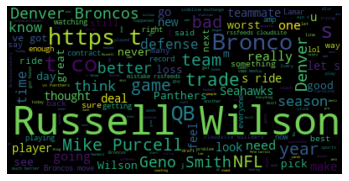

<IPython.core.display.Javascript object>

In [19]:
import matplotlib.pyplot as plt

consolidated = " ".join(word for word in df["cleaned_tweets"])

word_cloud = WordCloud(
    width=400, height=200, random_state=20, max_font_size=120
).generate(consolidated)

plt.imshow(word_cloud, interpolation="bilinear")
plt.axis("off")
plt.show()

### Data Analysis and Visualization

In [20]:
import seaborn as sns

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='polarity', ylabel='subjectivity'>

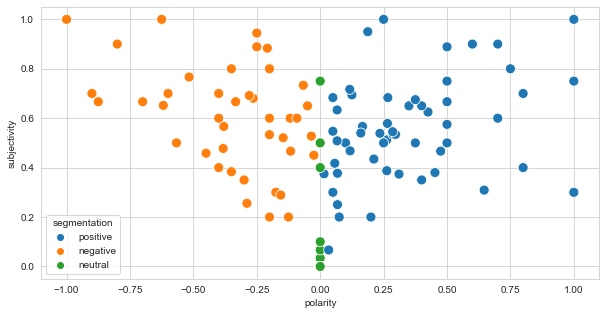

<IPython.core.display.Javascript object>

In [25]:
plt.figure(figsize=(10, 5))
sns.set_style("whitegrid")
sns.scatterplot(data=df, x="polarity", y="subjectivity", s=100, hue="segmentation")

<AxesSubplot:xlabel='segmentation', ylabel='count'>

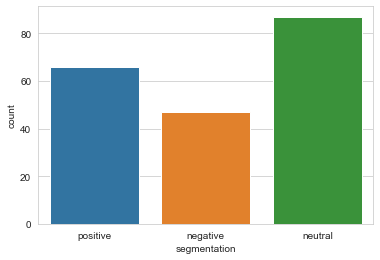

<IPython.core.display.Javascript object>

In [26]:
sns.countplot(data=df, x="segmentation")